In [114]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,20)

<h1>Example formatting in HTML - This is a big headline!</h1>
<h2>Edit this cell to see them - This is a smaller headline<h2>
<hr>
<b>Things can be bold....</b>

<i>Or italic</i>
<ul>
<li>Things can be in a list
<li>all sorts of things!
</ul>

<ol>
<li>Lists can have numbers
<li>they count automatically!
</ol>



<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

In [3]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head(100)


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Liberia,0.0,57.52500,246.9375,10.6875,3.258000,49.125000,705.3125,19.98750,14.7500,59.4375,40.6875,246.281748,2.788943e+06,9.86875
96,Libya,0.0,72.48750,139.6875,2.1875,0.010000,96.312500,547.3125,54.83750,2.5000,96.5000,96.5000,4598.161975,NaN,14.79375
97,Lithuania,1.0,72.80625,117.2500,0.0000,12.632667,94.750000,14.9375,49.23125,0.0000,88.8125,94.2500,9007.458623,1.926212e+06,16.10000
98,Luxembourg,1.0,80.78125,67.5625,0.0000,11.922000,92.375000,1.1250,47.82500,0.0000,98.0625,98.9375,53257.012741,2.652764e+05,13.63750


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Note: you'll have to look at the units to ensure you get it right. 

In [86]:
#Part 1
percap = (dfLE["GDP"]/dfLE["Population"])*1000000
dfLE["GDP Per Capita"]= percap
dfLE.head(10)

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP Per Capita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250,34.096126
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750,3041.600402
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250,131.541621
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375,194.651004
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375,NaN
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,6998.575103,2.012120e+07,16.50625,347.820882
6,Armenia,0.0,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,1999.986318,1.015165e+06,11.78750,1970.110333
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,34637.565047,4.587010e+06,20.03750,7551.229666
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,33827.476309,6.474880e+06,15.38750,5224.417589
9,Azerbaijan,0.0,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.8125,82.3125,3302.947807,2.157370e+06,11.35000,1531.006291


<h2>Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)</h2>
Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options
<li>5 points are for doing it in an efficient way - just listing off each column is lots of typing...
</ul>

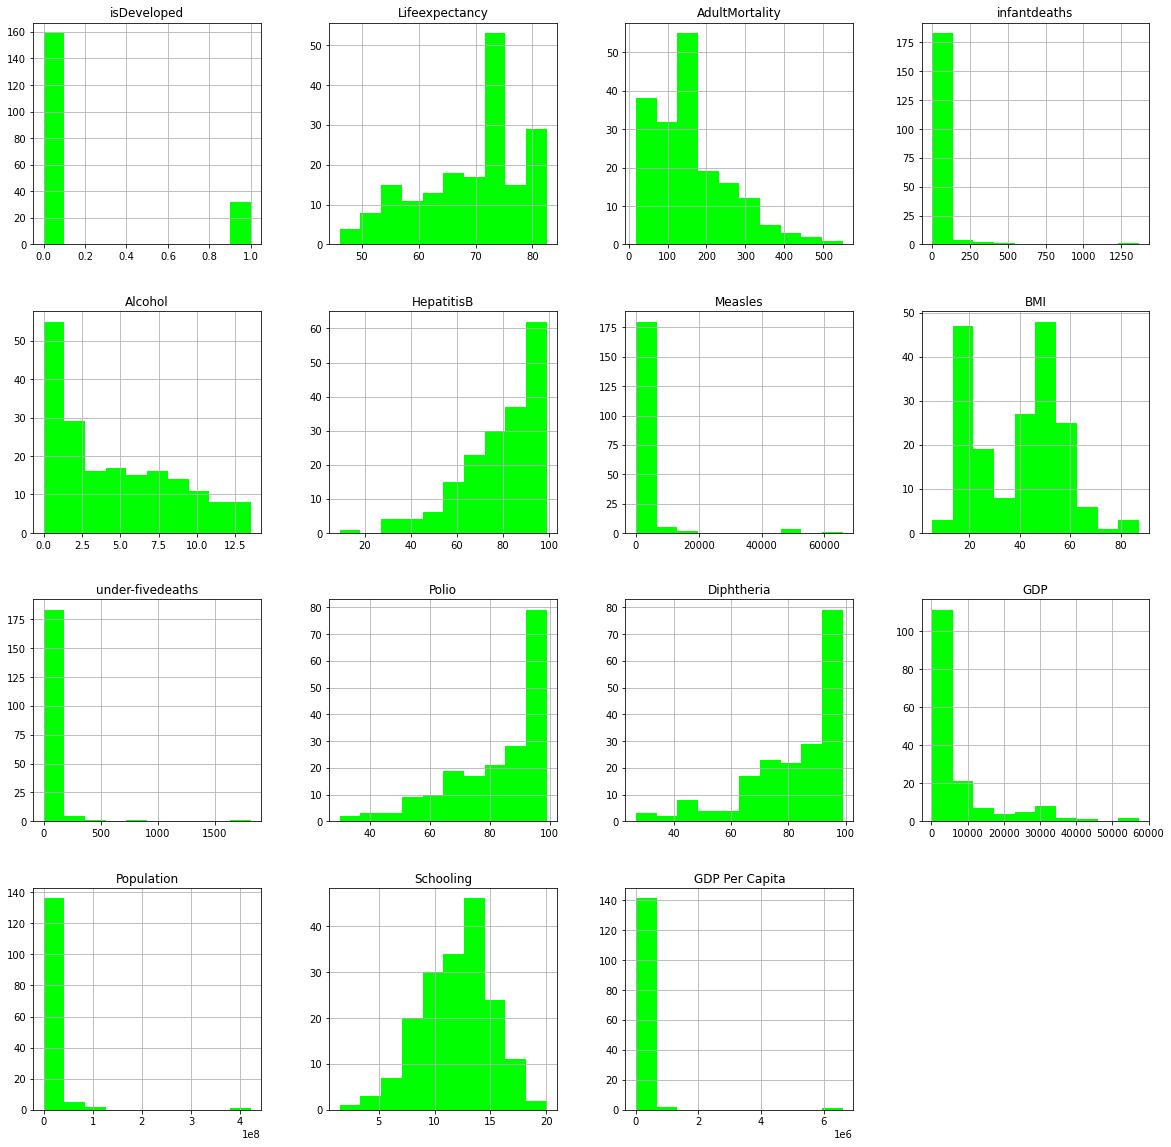

In [128]:
#Print all distributions
dfLE.hist(color='lime')
plt.rcParams["figure.figsize"] = (20,20)

ValueError: could not convert string to float: 'AdultMortality'

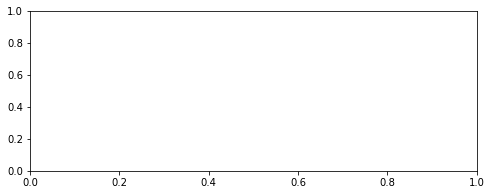

In [136]:
cdf = thinkstats2.Cdf(dfLE)
thinkplot.PrePlot(5,3)
thinkplot.Cdf(cdf)
thinkplot.SubPlot
plt.rcParams["figure.figsize"] = (20,20)

<h2>Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)</h2>
<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it without using a fit() method. Plot the emperical data on the same graph. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 

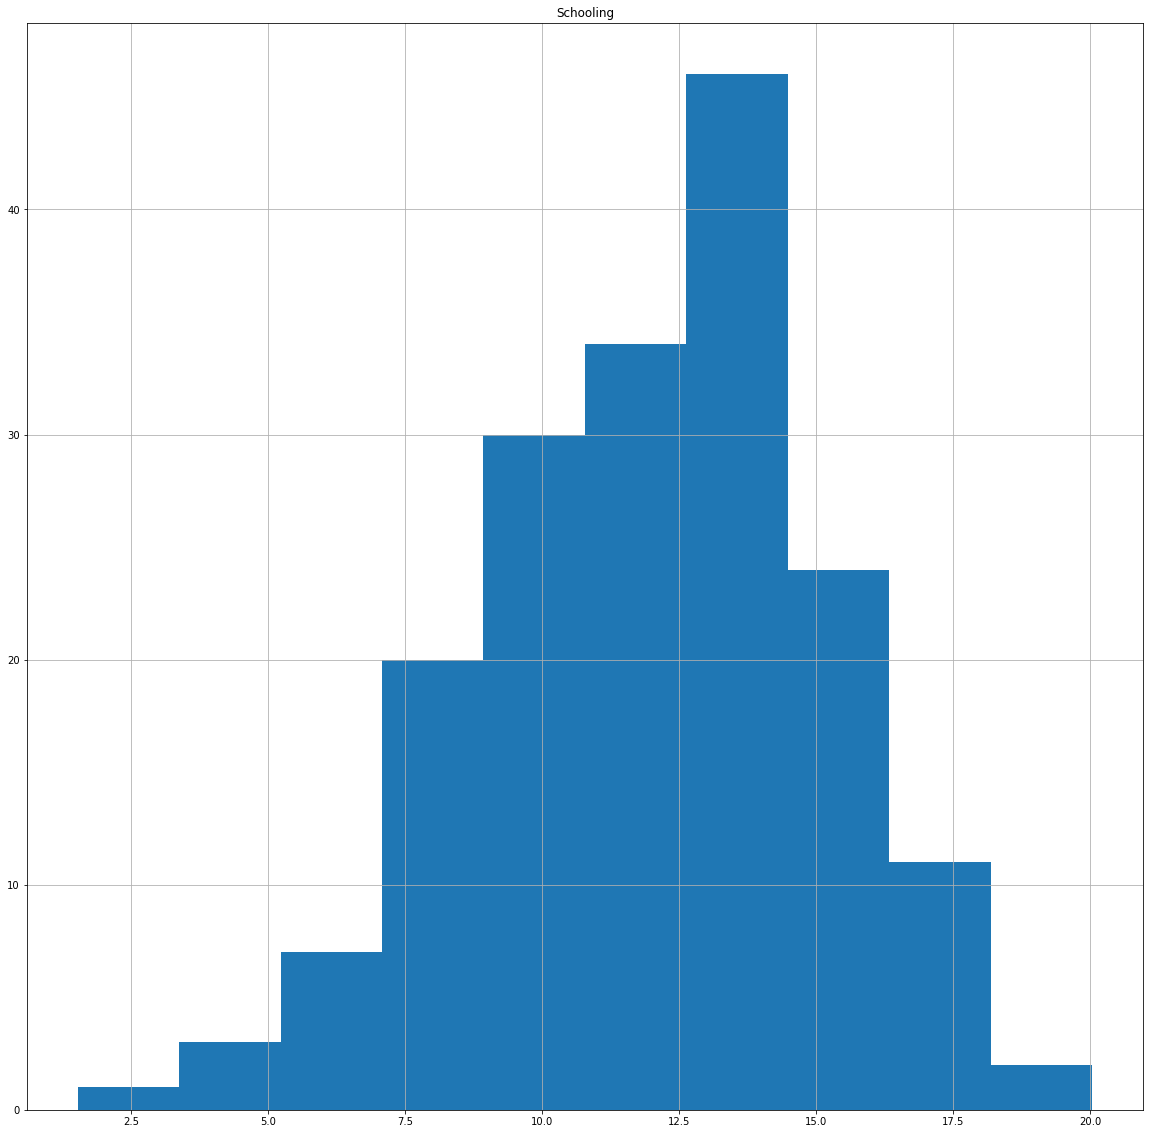

In [130]:
#Analytical for Schooling
df.hist('Schooling')
plt.rcParams["figure.figsize"] = (11,10)


<h2>Part 3: Create another analytical distribution for GDP per Capita (20pts)</h2>
<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 

In [ ]:
#Analytical for GDP/capita

<h2>Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)</h2>
<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 

In [ ]:
#Visualize correlations. 

<h2>Part 5: Calculate correlations (25pts)</h2>
<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [ ]:
#Calculate correlations and analyze. 